# Chapter 7- Unsupervised ML

## Exploring the dataset

First 10 samples
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Target values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Feature names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


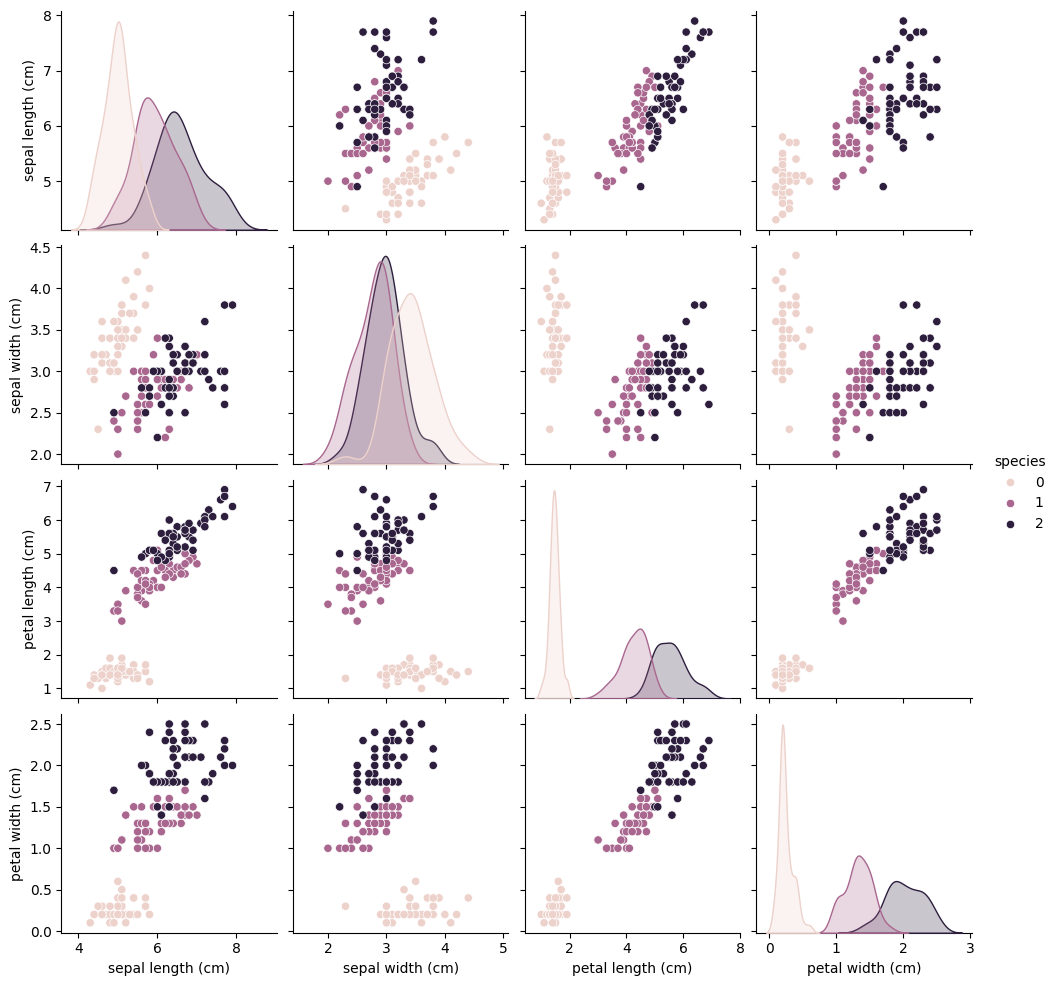

In [1]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

iris = load_iris()
print("First 10 samples")
print(iris.data[:10])  # prints the first 10 samples
print("\nTarget values")
print(iris.target)
print("\nFeature names")
print(iris.feature_names)

# PREPROCESSING STEPS

# The SimpleImputer fills missing values with the 'constant' (can be any other statistical measure like mean)
imputer = SimpleImputer(strategy='constant')
iris_imputed = imputer.fit_transform(iris.data)

# The StandardScaler standardizes the dataset by bringing all features onto a comparable scale
scaler = StandardScaler()
iris_standardized = scaler.fit_transform(iris_imputed)

# DATA VISUALIZATION
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df['species'] = iris.target

sns.pairplot(iris_df, hue="species")
plt.show()

# K-Means Clustering Algorithm

In a nutshell this algorithm groups data into K non-overlapping clusters, with every data point belonging to the cluster with the nearest centroid or mean. 

## How it works:
1. The algorithm randomly selects K data points (from n) to be the initial centroids.
2. The algorithm calculates the Euclidean distance between each data point and the centroids and assigns each data point to the centroid nearest to it.
3. The algorithm calculates the new centroid (mean) for each cluster.

These steps are repeated until the algorithm converges, i.e., the centroids don't change significantly between iterations or until we reach the desired number of iterations.

Suppose we have a botanist friend who has collected some Iris flowers but has mixed them up. They know that flowers come in three specific species but cannot distinguish them merely by looking. Here's where k-means clustering comes to our rescue!

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Initialise KMeans
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the model
kmeans.fit(iris_df)

# Get the cluster assignments for each data point
assignments = kmeans.labels_

print(assignments)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Error Calculation and Convergence in K-means
How does K-means knows when the assignments of data points to clusters are optimal? This is where convergence comes in! K-means has reached convergence when the centroids do not change substantially from one iteration to the next or when we reach the maximum number of iterations defined for the algorithm. 

So, how do we define a substantial change? That's through a term called inertia, or within-cluster sum-of-squares (WCSS). Inertia tells us the total squared distance from each point to its centroid; thus, the more compact our clusters are (i.e., points are close to their centroid), the smaller our inertia value will be. In simpler words, a lower inertia means better clusters!

In [3]:
print("Inertia: ", kmeans.inertia_)

Inertia:  78.85144142614601


## Limitations and Caveats of K-means Clustering

1. K-means is sensitive to the initial placement of centroids. Random initializations can lead to different clusters.
2. It is sensitive to outliers. Additionally, K-means assumes that all clusters are spherical and tend to perform poorly with non-convex shapes.
3. We need to specify the number of clusters beforehand, we often won't know the right number.

Various techniques can help us find the optimal number of clusters, like the Elbow Method and Average Silhouette Method. In the Elbow Method, we calculate the sum of squared errors (SSE) for some values of k (for example, 1 to 10), and the k after which SSE decreases abruptly (forming an elbow shape in the graph) is the optimal value of k.

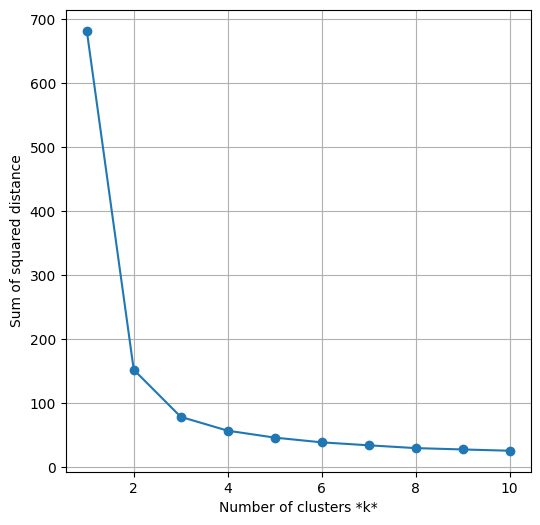

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# A list holds the SSE values for each k
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(iris_df)
    sse.append(kmeans.inertia_)
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.grid(True)
plt.show()

## Visualizing the Clusters

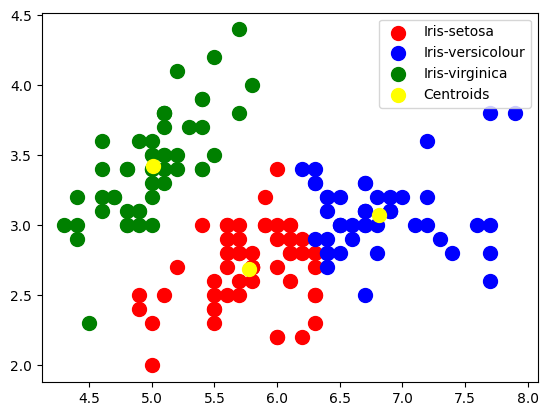

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assigning the features for our model
X = iris_df.iloc[:, [0, 1]].values

# Defining the KMeans clustering model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.legend()
plt.show()

## Assessing Cluster Quality with The Silhouette Score

The Silhouette Score measures how close each data point in one cluster is to the data points in the neighboring clusters. This score ranges from -1 to +1. A high value indicates that the data point fits well within its own cluster and is poorly matched to neighboring clusters.

In [6]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score(n=3): {silhouette_score(X, y_kmeans)}')


Silhouette Score(n=3): 0.4450525692083638


# DBSCAN Clustering

Unlike K-means, DBSCAN allows us to model complicated data structures that aren't necessarily spherical and don't need to have the same size or density. DBSCAN is an unsupervised learning algorithm that clusters data into groups based on the density of data points. It differs from K-means as it doesn't force every data point into a cluster and instead offers the ability to identify and mark out noise points, i.e., outliers.

DBSCAN distinguishes between three types of data points: core points, border points, and noise points. Core points have a specified number of data points within a given radius, forming what we call a dense region. Border points exist within a dense region but don't have a certain number of neighbors within the given radius. Noise points don't belong to any dense region and can be visualized as falling outside the clusters formed by the core and border points.

## Pros and Cons
The fundamental advantage of DBSCAN lies in its ability to create clusters of arbitrary shape, not just circular ones like in K-means. Also, we don't have to specify the number of clusters a priori, which can often be a big unknown. However, keep in mind DBSCAN's sensitivity to its parameter settings. If you select non-optimal parameters, DBSCAN could potentially miss clusters or overfit noise points. The algorithm can also struggle with clusters of differing densities, an aspect K-means is oblivious to.

## Parameters
In the frame of DBSCAN, there are two key control levers - eps and min_samples. The eps parameter represents the maximum distance between two data points to be considered in the same neighborhood, while min_samples represents the minimum number of points required to form a dense region.

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


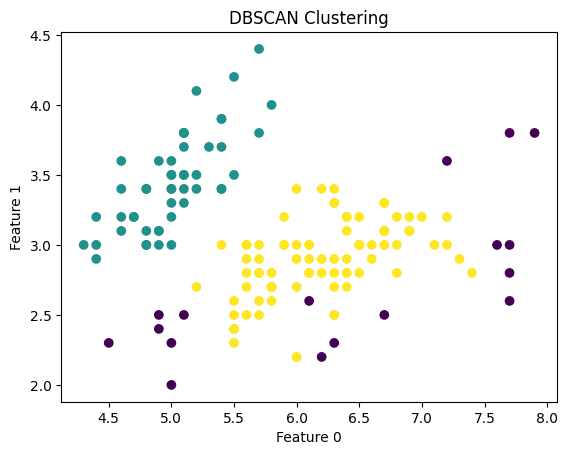

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_
print(labels)

# Extract coordinates for plotting
x = X[:, 0]
y = X[:, 1]

# Create a scatter plot
plt.scatter(x, y, c=labels, cmap='viridis')

# Set title and labels
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Assessing Cluster Quality with The Silhouette Score

We can calculate the silhouette score for our model to evaluate the clusters formed by DBSCAN. The silhouette score measures how close each point in one cluster is to the points in the neighboring clusters. Its value ranges from -1 (incorrect clustering) to +1 (highly dense clustering), with 0 denoting overlapping clusters. A higher value indicates a more defined cluster.

The silhouette score has a natural interpretation. The closer the score is to 1, the better the clusters. If the score is close to -1, it suggests that instances may have been assigned to the incorrect cluster.

In [8]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.486


# Dimensionality Reduction Techniques
- PCA
- ICA
- t-SNE

## PCA
Think of dimensionality reduction as reducing a complex book to a one-page summary, where this summary retains the crucial information from the book. One commonly used dimensionality reduction method is Principal Component Analysis (PCA). It aids in the removal of noise and redundancy in data, thereby enhancing the performance of machine learning models.

### How it works

It transforms the data so that the original features are substituted with new ones — principal components. These components are linear combinations of the original ones. They are designed to be free of association with each other (orthogonal) and arranged in order of reduction in the amount of variance (information) they obtain from the data.

Before applying PCA, **standardizing the data is crucial**. Variables measured at different scales do not contribute equally to the model's functioning and might create a bias. 

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [10]:
# Load the iris dataset
iris = load_iris()

# Standardize the features
x = StandardScaler().fit_transform(iris.data)

# PCA transformation
# By setting n_components equal to None, all components are kept
pca = PCA(n_components = None)
principalComponents = pca.fit_transform(x)

# Explained variance
explained_variance = pca.explained_variance_ratio_

print('Explained variance: ', explained_variance)
# Explained variance:  [0.72962445 0.22850762 0.03668922 0.00517871]

Explained variance:  [0.72962445 0.22850762 0.03668922 0.00517871]


### Interpreting and Visualizing PCA Results

In our case, the first principal component incorporates approximately 72.96% of the variance, while the second principal component houses about 23.03%. Collectively, these first two components account for 95.99% of the information. This means that, despite reducing our 4D data to 2D, we still capture 95.99% of the dataset's original complexity.

We can now visualize our results. The visualization helps to show if **similar items cluster together**, testing the effectiveness of PCA.

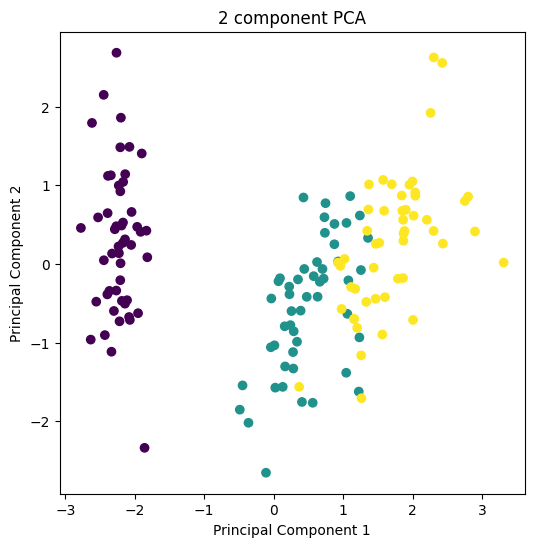

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Apply PCA with 2 principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(iris_scaled)

# Create the DataFrame for these principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Plot
plt.figure(figsize=(6,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c= iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')

plt.show()

## ICA (Independent Component Analysis)

Just like PCA, ICA is another dimensionality reduction technique to extract meaningful signals from noisy data. 

Imagine you're at a crowded party with a band playing, people chatting, and glasses clanging. Amid all this chaos, you're trying to listen to your friend's conversation. This is where ICA comes into play; much like your brain and ears, it helps pick out individual sound sources from a mishmash of noises. This is the essence of Independent Component Analysis.

For instance, in digital image processing, ICA can be used to unpack mixed signals into source images. Consider an instance where you have a set of images that have been overlaid on top of each other to create a new composite image (somewhat like Instagram filters!). ICA can separate out the original images, much as it parsed through our jumbled 'conversations' at the cocktail party.

Another critical concept employed by ICA is non-Gaussianity. ICA exploits the fact that real-world data distribution is usually non-Gaussian (not symmetrical, exhibiting skewness/kurtosis, etc.). ICA aims to find a rotation of the observed data such that the distribution of projections onto the basis vectors is non-Gaussian, as these are the 'interesting' parts of the data that hold pertinent information.

In code example below, each point in the scatterplot represents an Iris flower, and the colors correspond to different Iris species. 

In [12]:
import numpy as np
from sklearn.decomposition import FastICA
from sklearn import datasets
import matplotlib.pyplot as plt

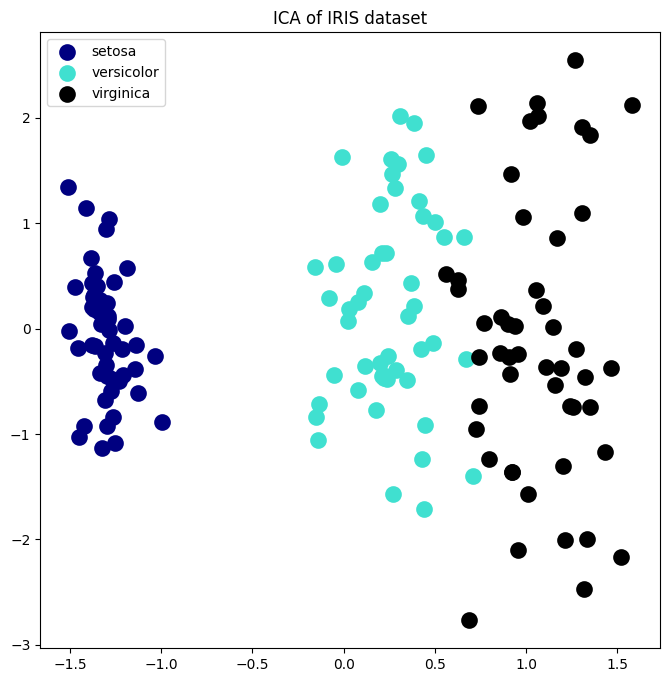

In [13]:
# load iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardizing the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Computing ICA
ica = FastICA(n_components=3, whiten="unit-variance")
X_transformed = ica.fit_transform(X) 

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(["navy", "turquoise", "black"], [0, 1, 2], iris.target_names):
    plt.scatter(X_transformed[iris.target == i, 0], X_transformed[iris.target == i, 1], color=color, s=100, lw=2, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('ICA of IRIS dataset')
plt.show()

## t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is another dimensionality reduction technique. Simply put, t-SNE maps high-dimensional data points to a lower-dimensional space (2D or 3D). Fascinatingly, it keeps similar data points close together and dissimilar data points far apart in this lower-dimensional space.

Two main **hyperparameters** are crucial in the workings of t-SNE:

1. Perplexity: This element measures how to balance attention to local and global aspects of the data. It can be considered a knob that sets the number of effective nearest neighbors. Typically, it is set between 5 and 50. Smaller values make t-SNE focus more on local structure, while larger values make the algorithm look for global patterns.
2. Learning Rate: This variable determines how fast the algorithm learns from the data. It's usually set between 10 and 1000. However, keep in mind that, just like many machine learning algorithms, setting the learning rate too high or too low could lead to poor results.


In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

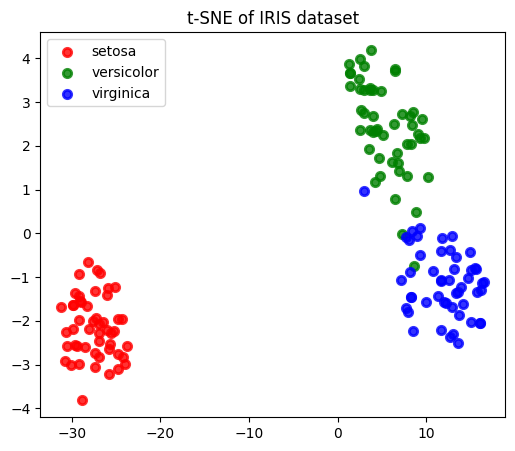

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(6, 5))
colors = ['r', 'g', 'b']
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE of IRIS dataset')
plt.show()

The plot displays the three Iris species in a 2D space, showcasing that the species form distinct clusters. This serves as a proof-of-concept for t-SNE's capability in maintaining inherent data structures.

### Limitations of t-SNE

1. Computational Resources: t-SNE can be computationally intensive for large datasets, an important consideration when working with big data.
2. Deceptive Simplicity: It's easy to misinterpret t-SNE results due to its emphasis on preserving local structures and viewing clusters as a byproduct.
3. Hyperparameter Sensitivity: The results can be heavily influenced by both perplexity and learning rate, accounting for an additional layer of complexity.


# PCA vs. ICA vs. t-SNE

These techniques can be distinguished based on the following criteria:

1. Explained Variance: PCA directly measures the retained variance in the transformed data, while ICA and t-SNE do not offer as explicit a measure.
2. Computational Efficiency: PCA demands fewer computing resources than ICA and t-SNE.
3. Interpretability: PCA and ICA produce encoded dimensions that are interpretable, unlike the reduced dimensions in t-SNE, which aren't directly interpretable.
4. Modelling Technique: While all three function as unsupervised techniques and are independent of any labels, they aim to achieve different things. PCA looks for the greatest variance, ICA looks for statistical independence, while t-SNE makes probability distributions in different dimensions as similar as possible.



# Random Quote

"The way to get started is to quit talking and begin doing" – Walt Disney 

or 

in other words "Think less, do more" - Amna Gul
